**bold text**#Imports

In [ ]:
import numpy as np
import pandas as pd
import datetime as DT
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

***italicized text***#Access to GoogleDrive

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Dataset

KeyboardInterrupt: ignored

**bold text**#Load dataset

In [ ]:
data = pd.read_csv('raw_during.csv').values

#Preprocessing

In [ ]:
numPositions = 9  # or sensors
time_step = 20 # min
positions = list()

num = np.size(data,axis=0)
numMins = (int)(np.ceil(24*60 / time_step))

In [ ]:
data_process = np.zeros((numMins , numPositions))

t2 = DT.datetime(1900,1,1)
for i in range(num):
  t1 = DT.datetime.strptime(data[i,1], '%H:%M:%S')
  min = (t1-t2).total_seconds() / 60.0

  min_idx = (int)(min // time_step)

  pos = data[i , 6]
  try:
    pos_idx = positions.index(pos)
  except:
    positions.append(pos)
  finally:
    pos_idx = positions.index(pos)

  count = data[i , 2]
  data_process[min_idx , pos_idx] += count

#Clustring

In [ ]:
numCluster = 4
kmeans = KMeans(n_clusters = numCluster , random_state = 0).fit(data_process)
labels = kmeans.labels_

In [ ]:
image = Image.open('background.jpg')
draw = ImageDraw.Draw(image)
color = 'rgb(0, 0, 0)'
font = ImageFont.truetype( font= 'Roboto-Light.ttf',size=45)

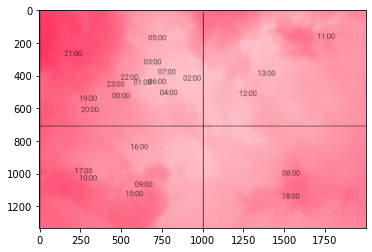

In [ ]:
(s1 , s2) = image.size
b = np.ceil(s1 / numCluster * 2)
for i in range(len(labels)):
  minutes = i * time_step
  text = '{:02d}:{:02d}'.format(*divmod(minutes, 60))
  r = np.random.rand((2))
  r = np.random.randn((2))/5+0.5
  j = labels[i] % (numCluster/2)
  x = j * b + r[0] * b
  if labels[i] < numCluster/2:
    y = (s2 / 2) * r[1]
  else:
    y = (s2 / 2) + (s2/2)* r[1]

  x = (int)(x)
  y = (int)(y)

  draw.text((x, y), text, fill=color, font=font)

for i in range(s1):
  draw.text((i, s2/2), '_', fill=color, font=font)
for i in range((int)(numCluster/2)):
  for j in range(s2):
    draw.text((i*b, j), '|', fill=color, font=font)

plt.imshow(np.asarray(image))
image.save('res.png')

In [ ]:
for c in range(numCluster):
  print('Group '+str(c+1)+':')
  for i in range(len(labels)):
    if labels[i] != c:
      continue
    
    minutes = i * time_step
    text = '{:02d}:{:02d}'.format(*divmod(minutes, 60))
    print('\t'+text)

Group 1:
	00:00
	00:20
	00:40
	01:00
	01:20
	01:40
	02:00
	02:20
	02:40
	03:00
	03:20
	03:40
	04:00
	04:20
	04:40
	05:00
	05:20
	05:40
	06:00
	06:20
	06:40
	07:00
	07:20
	07:40
	08:00
	18:40
	19:00
	19:20
	19:40
	20:00
	20:20
	20:40
	21:00
	21:20
	21:40
	22:00
	22:20
	22:40
	23:00
	23:20
	23:40
Group 2:
	09:20
	10:20
	11:00
	11:40
	12:00
	12:40
	13:00
	13:40
	14:00
	14:40
	15:00
	15:20
	16:20
	17:20
Group 3:
	08:20
	08:40
	09:00
	09:40
	10:00
	10:40
	15:40
	16:00
	16:40
	17:00
	17:40
	18:00
	18:20
Group 4:
	11:20
	12:20
	13:20
	14:20
